# STA130 HW04 - Gabriel George

## Week of Oct21

### 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create *python* code explicitly demonstrating your explanation using *numpy* and *scipy.stats*

Simple Linear Regression models the relation ship between 2 variables. The x (predictor) and y (outcome). Simplelinear reggression is using data to "predict" and make a straight line that matches with some data. Unlike normal high school math whihc uses something of the form y = mx +b. Stats uses a slightly modified version which has Yi = β0 + β1 Xi + εi, where εi ∼ N(0,σ2). This allows data to be "fitted" to a line in order to make predections. The intercept means...

The first part is a the linear relationship: β₀ + β₁X


β₀ (beta-zero) is the intercept: the expected Y value when X = 0
β₁ (beta-one) is the slope: the change in Y for a one-unit increase in X


The second part is a random component (ε, epsilon): random errors that follow a normal distribution with:

Mean of 0
Constant standard deviation (σ)


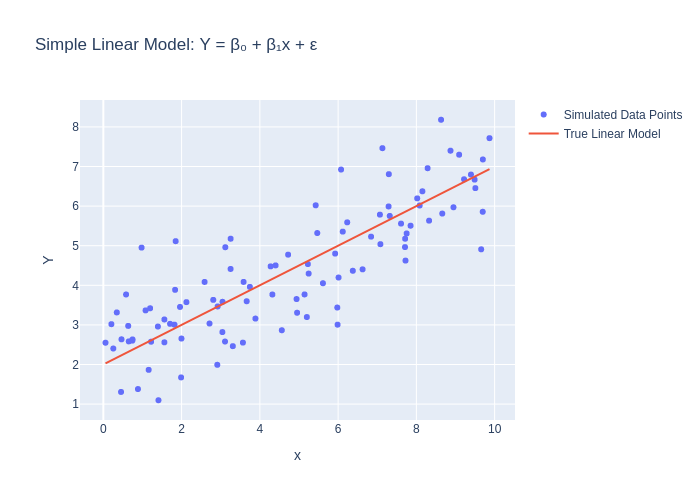

In [34]:
import numpy as np
from scipy import stats
import plotly.graph_objects as go

# Set random seed for reproducibility
np.random.seed(42)

# Specify parameters
n = 100                    # number of observations
beta0 = 2                  # intercept coefficient
beta1 = 0.5               # slope coefficient
sigma = 1.0               # error standard deviation

# Generate predictors (x) using uniform distribution
x = stats.uniform(loc=0, scale=10).rvs(n)

# Generate errors from normal distribution
errors = stats.norm(loc=0, scale=sigma).rvs(n)

# Create outcomes (Y) using Simple Linear Model equation
Y = beta0 + beta1 * x + errors

# Create figure
fig = go.Figure()

# Add scatter plot of data points
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', 
                        name='Simulated Data Points'))

# Add the true linear model line (not fitted!)
x_line = np.array([min(x), max(x)])
Y_line = beta0 + beta1 * x_line

fig.add_trace(go.Scatter(x=x_line, y=Y_line, mode='lines',
                        name='True Linear Model'))

# Update layout
fig.update_layout(
    title='Simple Linear Model: Y = β₀ + β₁x + ε',
    xaxis_title='x',
    yaxis_title='Y',
    showlegend=True
)

fig.show(renderer="png")

### 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using *pandas* and *import statsmodels.formula.api as smf*

Model Summary:
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     219.4
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           9.38e-27
Time:                        23:28:47   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

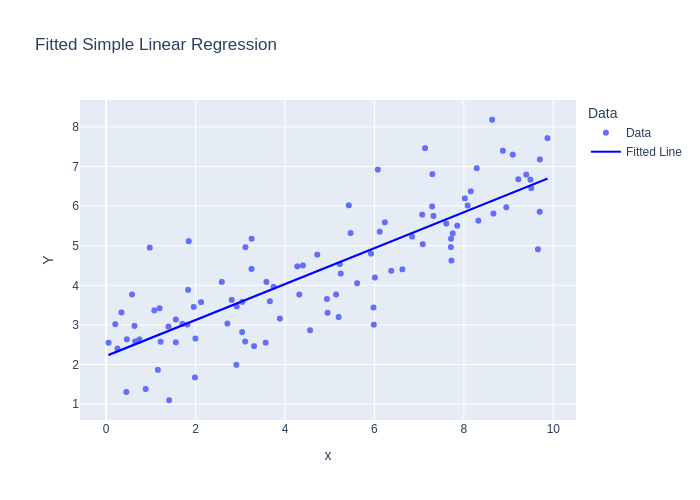

In [35]:
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import statsmodels.formula.api as smf  # For fitting statistical models using R-style formulas

# Use our previously simulated data
np.random.seed(42)
n = 100
beta0, beta1 = 2, 0.5
sigma = 1.0

# Generate data
x = stats.uniform(loc=0, scale=10).rvs(n)
errors = stats.norm(loc=0, scale=sigma).rvs(n)
Y = beta0 + beta1 * x + errors

# Create pandas DataFrame
df = pd.DataFrame({
    'x': x,
    'Y': Y
})

# Fit the model
# smf.ols creates the model specification (formula + data)
model_data_specification = smf.ols("Y ~ x", data=df)
# .fit() estimates the model parameters using ordinary least squares
fitted_model = model_data_specification.fit()

# Print model summary and specific components
print("Model Summary:")
print("-" * 50)
print(fitted_model.summary())  # Comprehensive summary of model fit and diagnostics

print("\nCoefficient Table:")
print("-" * 50)
print(fitted_model.summary().tables[1])  # Table of coefficient estimates and their statistics

print("\nModel Parameters:")
print("-" * 50)
print("fitted_model.params:")  # Parameter names and their estimates
print(fitted_model.params)
print("\nfitted_model.params.values:")  # Just the parameter values
print(fitted_model.params.values)
print("\nfitted_model.rsquared:")  # R-squared value (proportion of variance explained)
print(fitted_model.rsquared)

# Create visualization
df['Data'] = 'Data'  # Add column for legend labeling
fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Fitted Simple Linear Regression')

# Add the fitted line manually (equivalent to trendline='ols')
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
               line=dict(color='blue'), name="Fitted Line")

# Compare true vs fitted parameters
print("\nParameter Comparison:")
print("-" * 50)
print(f"True intercept (β₀): {beta0:.4f}")
print(f"Fitted intercept: {fitted_model.params['Intercept']:.4f}")
print(f"True slope (β₁): {beta1:.4f}")
print(f"Fitted slope: {fitted_model.params['x']:.4f}")

fig.show(renderer="png")

### 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; *but, hint though: simulation of random sampling variation*

The difference between the two lines:

The Theoretical Line (red dashed):

- Represents the true underlying relationship Y = β₀ + β₁x
- Shows the expected value of Y for each x
- Is based on the parameters we chose (β₀ = 2, β₁ = 0.5)
- Is what we'd see with infinite data or no random error


The Fitted Line (blue solid):

- Is estimated from the observed data points
- Varies from the true line due to random sampling variation
- Represents our best estimate of the relationship based on this particular sample
- Would be different if we generated a new sample (even with the same true parameters)


The key insight is that the fitted line differs from the theoretical line because:

We only have a finite sample of data points

Each data point includes random error (ε)

This sampling variation means our parameter estimates (β̂₀, β̂₁) won't exactly match the true parameters (β₀, β₁)
If we generated new samples and fitted new lines, we'd get slightly different fitted lines each time, but they would all be estimates of the same underlying theoretical line

Parameter Comparison:
--------------------------------------------------
True intercept (β₀): 2.0000
Fitted intercept: 2.2151
True slope (β₁): 0.5000
Fitted slope: 0.4540


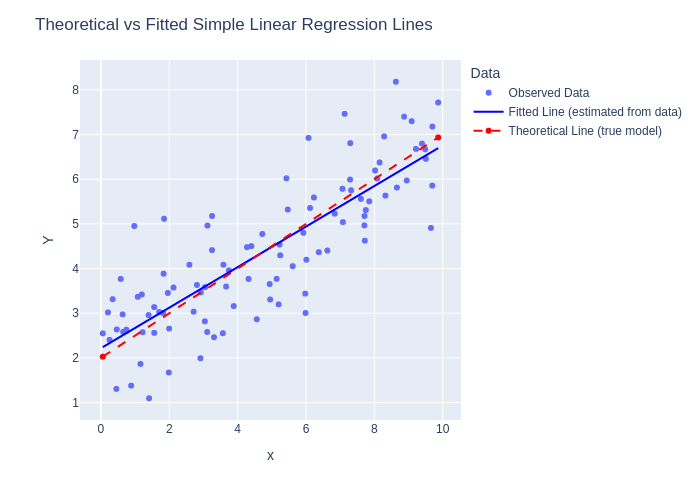

In [36]:
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px

# Generate data (same as before)
np.random.seed(42)
n = 100
beta0, beta1 = 2, 0.5
sigma = 1.0

# Generate data
x = stats.uniform(loc=0, scale=10).rvs(n)
errors = stats.norm(loc=0, scale=sigma).rvs(n)
Y = beta0 + beta1 * x + errors

# Create DataFrame and fit model
df = pd.DataFrame({'x': x, 'Y': Y})
df['Data'] = 'Observed Data'

# Fit the model
import statsmodels.formula.api as smf
fitted_model = smf.ols("Y ~ x", data=df).fit()

# Create scatter plot with fitted line
fig = px.scatter(df, x='x', y='Y', color='Data')

# Add the fitted line
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
               line=dict(color='blue'), 
               name="Fitted Line (estimated from data)")

# Add the theoretical (true) line
x_line = np.array([min(x), max(x)])
Y_line = beta0 + beta1 * x_line
fig.add_scatter(x=x_line, y=Y_line,
               line=dict(color='red', dash='dash'),
               name="Theoretical Line (true model)")

fig.update_layout(
    title='Theoretical vs Fitted Simple Linear Regression Lines',
    xaxis_title='x',
    yaxis_title='Y'
)

# Print comparison
print("Parameter Comparison:")
print("-" * 50)
print(f"True intercept (β₀): {beta0:.4f}")
print(f"Fitted intercept: {fitted_model.params['Intercept']:.4f}")
print(f"True slope (β₁): {beta1:.4f}")
print(f"Fitted slope: {fitted_model.params['x']:.4f}")

fig.show(renderer="png")

### 4. Explain how *fitted_model.fittedvalues* are derived on the basis of *fitted_model.summary().tables[1]* (or more specifically  *fitted_model.params* or *fitted_model.params.values*)

The fitted values (fitted_model.fittedvalues) are derived from fitted_model.params using the same linear equation as the theoretical model, but with estimated parameters:

The model parameters (fitted_model.params) contain:

β̂₀ (Intercept): The estimated intercept
β̂₁ (slope): The estimated slope coefficient


For each x value in the data, the fitted value Ŷ is calculated as:
Ŷ = β̂₀ + β̂₁x
So fitted_model.fittedvalues is simply the vector of Ŷ values calculated by applying this equation to every x value in the data

### 5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by *trendline='ols'* and *smf.ols(...).fit()*) and why it requires "squares"

The "ordinary least squares" (OLS) method chooses the line that minimizes the sum of squared vertical distances between the observed Y values and the fitted line.

It uses squares because:
1. Squaring makes all differences positive (avoiding positive and negative errors canceling out)
2. Squaring penalizes larger errors more heavily than smaller ones
3. Squaring makes the minimization problem mathematically tractable (the solution has a unique closed form)


### 6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. _fitted_model.fittedvalues_)"; and therefore, why _fitted_model.rsquared_ can be interpreted as a measure of the accuracy of the model; and, therefore what the two _np.corrcoef(...)[0,1]\*\*2_ expressions capture in the context of _Simple Linear Regression models_.

1. `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()`
2. `fitted_model.rsquared`
3. `np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2`
4. `np.corrcoef(Y,x)[0,1]**2`

In [37]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf

# Generate data
np.random.seed(42)
n = 100
beta0, beta1 = 2, 0.5
sigma = 1.0

x = stats.uniform(loc=0, scale=10).rvs(n)
errors = stats.norm(loc=0, scale=sigma).rvs(n)
Y = beta0 + beta1 * x + errors

# Fit model
df = pd.DataFrame({'x': x, 'Y': Y})
fitted_model = smf.ols("Y ~ x", data=df).fit()

# Calculate R-squared in different ways
# 1. Using sum of squared residuals / total sum of squares
manual_rsquared = 1 - ((Y - fitted_model.fittedvalues)**2).sum() / ((Y - Y.mean())**2).sum()

# 2. Using statsmodels
model_rsquared = fitted_model.rsquared

# 3. Using correlation between Y and fitted values
correlation_rsquared = np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2

# 4. Using correlation between Y and x
x_correlation_rsquared = np.corrcoef(Y, x)[0,1]**2

print("Understanding R-squared Calculations:")
print("-" * 50)

print("\n1. Manual calculation (1 - SSR/SST):")
print(f"R² = {manual_rsquared:.4f}")
print("This shows proportion of variance in Y explained by the model")
print("SSR = Sum of Squared Residuals (unexplained variation)")
print("SST = Total Sum of Squares (total variation)")

print("\n2. Statsmodels R-squared:")
print(f"R² = {model_rsquared:.4f}")

print("\n3. Correlation between Y and fitted values squared:")
print(f"R² = {correlation_rsquared:.4f}")

print("\n4. Correlation between Y and x squared:")
print(f"R² = {x_correlation_rsquared:.4f}")

# Demonstrate components
total_variance = ((Y - Y.mean())**2).sum()
unexplained_variance = ((Y - fitted_model.fittedvalues)**2).sum()
explained_variance = total_variance - unexplained_variance

print("\nVariance Components:")
print("-" * 50)
print(f"Total variance in Y: {total_variance:.4f}")
print(f"Unexplained variance: {unexplained_variance:.4f}")
print(f"Explained variance: {explained_variance:.4f}")
print(f"Proportion explained (R²): {explained_variance/total_variance:.4f}")

Understanding R-squared Calculations:
--------------------------------------------------

1. Manual calculation (1 - SSR/SST):
R² = 0.6913
This shows proportion of variance in Y explained by the model
SSR = Sum of Squared Residuals (unexplained variation)
SST = Total Sum of Squares (total variation)

2. Statsmodels R-squared:
R² = 0.6913

3. Correlation between Y and fitted values squared:
R² = 0.6913

4. Correlation between Y and x squared:
R² = 0.6913

Variance Components:
--------------------------------------------------
Total variance in Y: 261.2649
Unexplained variance: 80.6585
Explained variance: 180.6065
Proportion explained (R²): 0.6913


### 7. Indicate a couple of the assumptions of the *Simple Linear Regression* model specification that do not seem compatible with the example data below

Two major assumptions of SLR that appear violated in this data are:

Linearity: The relationship between fertilizer amount and crop yield appears non-linear

The SLR model assumes Y is a linear function of x (plus random error)
The scatter plot shows a clear curved pattern
The relationship appears more exponential or polynomial


Homoscedasticity (constant variance): The spread of points around the fitted line increases with x

The SLR model assumes errors have constant variance σ²
The residuals plot shows the spread of residuals increases with fitted values
This suggests the variance of Y increases with larger fertilizer amounts



Other assumptions like normality of errors also appear questionable (as seen in the Q-Q plot and residuals histogram), but the non-linearity and heteroscedasticity (non-constant variance) are the most striking violations.
These violations suggest a simple linear regression may not be appropriate for this data - perhaps a non-linear transformation of x or Y would be more suitable.

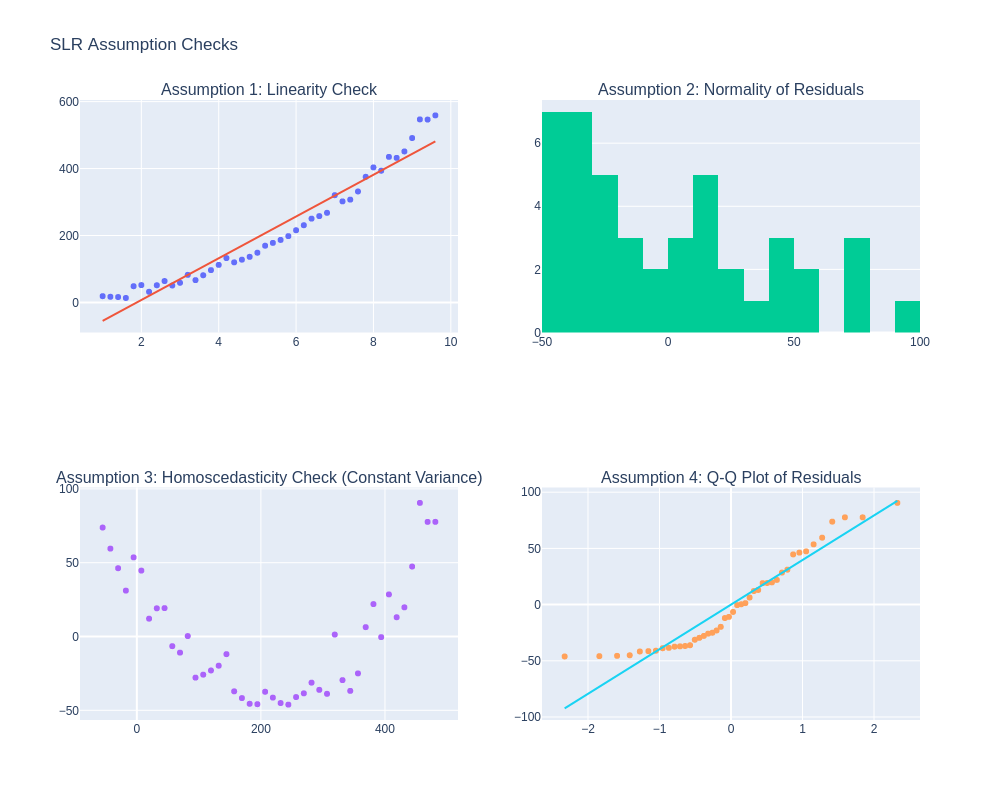

In [38]:
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats

# Recreate the data
data = {
    'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                     2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                     4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                     6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                     8.2, 8.4, 8.6, 8.8, 9, 9.2, 9.4, 9.6],
    'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                             63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                             132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                             186.7, 198.1, 215.7, 230.7, 250.4, 258., 267.8, 
                             320.4, 302., 307.2, 331.5, 375.3, 403.4, 393.5,
                             434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]
}
df = pd.DataFrame(data)

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df['Amount of Fertilizer (kg) (x)'], 
    df['Crop Yield (tons) (Y)']
)

# Calculate fitted values and residuals
df['Fitted'] = intercept + slope * df['Amount of Fertilizer (kg) (x)']
df['Residuals'] = df['Crop Yield (tons) (Y)'] - df['Fitted']

# Create figure with subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    'Assumption 1: Linearity Check',
    'Assumption 2: Normality of Residuals',
    'Assumption 3: Homoscedasticity Check (Constant Variance)',
    'Assumption 4: Q-Q Plot of Residuals'
))

# 1. Linearity Check
fig.add_trace(
    go.Scatter(x=df['Amount of Fertilizer (kg) (x)'], 
               y=df['Crop Yield (tons) (Y)'], 
               mode='markers', 
               name='Data'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df['Amount of Fertilizer (kg) (x)'], 
               y=df['Fitted'], 
               mode='lines', 
               name='Linear Fit'),
    row=1, col=1
)

# 2. Histogram of Residuals
fig.add_trace(
    go.Histogram(x=df['Residuals'], 
                 nbinsx=15, 
                 name='Residuals'),
    row=1, col=2
)

# 3. Residuals vs Fitted Values (Homoscedasticity)
fig.add_trace(
    go.Scatter(x=df['Fitted'], 
               y=df['Residuals'], 
               mode='markers',
               name='Residuals vs Fitted'),
    row=2, col=1
)

# 4. Q-Q Plot
theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(df)))
sorted_residuals = np.sort(df['Residuals'])
fig.add_trace(
    go.Scatter(x=theoretical_quantiles, 
               y=sorted_residuals, 
               mode='markers',
               name='Q-Q Plot'),
    row=2, col=2
)

# Add reference line for Q-Q plot
qq_line = np.array([min(theoretical_quantiles), max(theoretical_quantiles)])
fig.add_trace(
    go.Scatter(x=qq_line, 
               y=qq_line * np.std(df['Residuals']) + np.mean(df['Residuals']),
               mode='lines',
               name='Reference Line'),
    row=2, col=2
)

fig.update_layout(height=800, width=1000, showlegend=False, title_text="SLR Assumption Checks")
fig.show(renderer="png")

I used a chatbot that was not able to provide links. Below is my summary:
### Chatbot Summary

Here's a summary of our conversation about Simple Linear Regression (SLR):

1. **Theoretical Model Specification**
- We started with the mathematical specification of SLR: Y = β₀ + β₁x + ε, where ε ~ N(0, σ²)
- Created code to simulate data from this model by:
  - Generating fixed x values
  - Generating normal errors
  - Combining them with chosen β₀ and β₁ to produce Y
- Visualized the true (theoretical) line and scattered points around it

2. **Model Fitting**
- Showed how to fit SLR to data using statsmodels (`smf.ols`)
- Explained how fitted values are calculated: Ŷ = β̂₀ + β̂₁x
- Demonstrated the difference between theoretical and fitted lines:
  - Theoretical line uses true parameters
  - Fitted line estimates parameters from data
  - Differences occur due to random sampling variation

3. **Ordinary Least Squares**
- Explained OLS method chooses line minimizing sum of squared residuals
- Visualized squared residuals and why squares are used:
  - Makes errors positive
  - Penalizes large errors more
  - Makes problem mathematically tractable

4. **R-squared Interpretation**
- Demonstrated multiple equivalent ways to calculate R²:
  - 1 - (SSR/SST)
  - fitted_model.rsquared
  - Squared correlation between Y and fitted values
  - Squared correlation between Y and x
- Explained R² as proportion of variance explained by the model

5. **Model Assumptions**
- Used fertilizer-crop yield example to demonstrate assumption violations
- Identified key violations:
  - Non-linearity in relationship
  - Non-constant variance (heteroscedasticity)
- Created diagnostic plots to visualize assumptions:
  - Scatter plot for linearity
  - Residual plots for homoscedasticity
  - Q-Q plots and histograms for normality

Throughout, we emphasized the distinction between:
- The theoretical model that generates data
- The process of fitting models to observed data
- The assumptions underlying the model and how to check them

## Week of Nov04


### 8. Specify a *null hypothesis* of "no linear association (on average)" in terms of the relevant *parameter* of the *Simple Linear Regression* model, and use the code below to characterize the evidence in the data relative to the *null hypothesis* and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

For Simple Linear Regression, the null hypothesis of "no linear association (on average)" is expressed as:
$$H_0: \beta_1 = 0$$
where $\beta_1$ is the slope parameter in the regression model:
$$\text{duration} = \beta_0 + \beta_1 \cdot \text{waiting} + \epsilon$$


=== Old Faithful Geyser Linear Regression Analysis ===

Null Hypothesis (H₀): β₁ = 0 (no linear association)
Alternative Hypothesis (H₁): β₁ ≠ 0 (there is a linear association)

Key Statistics:
Slope coefficient (β₁): 0.0756
Standard Error: 0.0022
t-statistic: 34.089
p-value: 8.13e-100
R-squared: 0.811

Evidence Interpretation:
With a p-value of 8.13e-100, we have very strong evidence against the null hypothesis.
The slope coefficient indicates that for each minute increase in waiting time,
the eruption duration increases by approximately 4.5 seconds on average.
This linear relationship explains 81.1% of the variation in eruption durations.


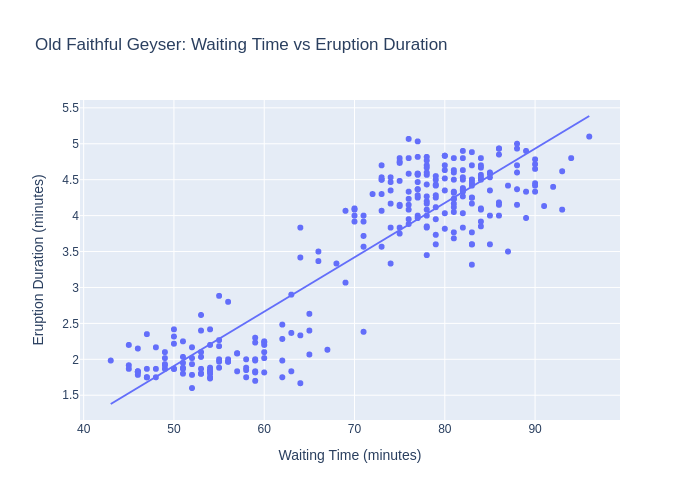

In [39]:
import seaborn as sns
import statsmodels.formula.api as smf
import plotly.express as px
import pandas as pd
import numpy as np

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Fit the linear regression model
linear_specification = 'duration ~ waiting'
model = smf.ols(linear_specification, data=old_faithful)
fitted_model = model.fit()

# Print summary statistics
print("=== Old Faithful Geyser Linear Regression Analysis ===\n")
print("Null Hypothesis (H₀): β₁ = 0 (no linear association)")
print("Alternative Hypothesis (H₁): β₁ ≠ 0 (there is a linear association)\n")

# Extract key statistics
slope = fitted_model.params['waiting']
std_err = fitted_model.bse['waiting']
t_stat = fitted_model.tvalues['waiting']
p_value = fitted_model.pvalues['waiting']
r_squared = fitted_model.rsquared

print(f"Key Statistics:")
print(f"Slope coefficient (β₁): {slope:.4f}")
print(f"Standard Error: {std_err:.4f}")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.2e}")
print(f"R-squared: {r_squared:.3f}\n")

# Interpret the evidence
print("Evidence Interpretation:")
if p_value > 0.1:
    evidence = "no"
elif p_value > 0.05:
    evidence = "weak"
elif p_value > 0.01:
    evidence = "moderate"
elif p_value > 0.001:
    evidence = "strong"
else:
    evidence = "very strong"

print(f"With a p-value of {p_value:.2e}, we have {evidence} evidence against the null hypothesis.")
print(f"The slope coefficient indicates that for each minute increase in waiting time,")
print(f"the eruption duration increases by approximately {slope * 60:.1f} seconds on average.")
print(f"This linear relationship explains {r_squared * 100:.1f}% of the variation in eruption durations.")

# Create visualization
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser: Waiting Time vs Eruption Duration",
                 labels={'waiting': 'Waiting Time (minutes)', 
                        'duration': 'Eruption Duration (minutes)'},
                 trendline='ols')
fig.show(renderer="png")

### 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the *null hypothesis* in the context of short wait times which are less than  *short_wait_limit* values of *62*, *64*, *66*.

=== Analysis of Old Faithful Geyser Data for Short Wait Times ===

Null Hypothesis (H₀): β₁ = 0 (no linear association)
Alternative Hypothesis (H₁): β₁ ≠ 0 (there is a linear association)



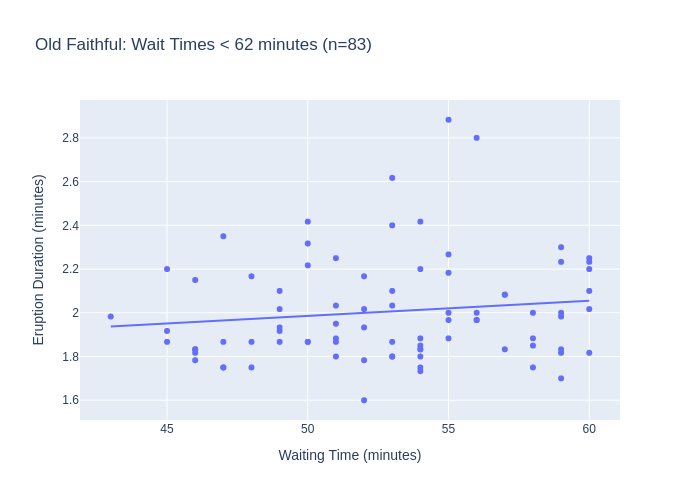


Results for wait times < 62 minutes (n=83):
Slope coefficient (β₁): 0.0069
Standard Error: 0.0058
t-statistic: 1.188
p-value: 2.38e-01
R-squared: 0.017
Evidence level: no
Practical interpretation: For wait times < 62 minutes,
a one-minute increase in waiting time is associated with
a 0.4-second change in eruption duration


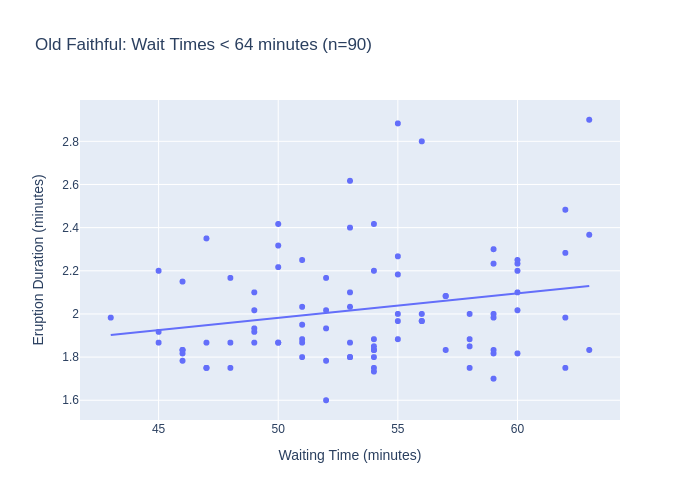


Results for wait times < 64 minutes (n=90):
Slope coefficient (β₁): 0.0114
Standard Error: 0.0053
t-statistic: 2.127
p-value: 3.63e-02
R-squared: 0.049
Evidence level: moderate
Practical interpretation: For wait times < 64 minutes,
a one-minute increase in waiting time is associated with
a 0.7-second change in eruption duration


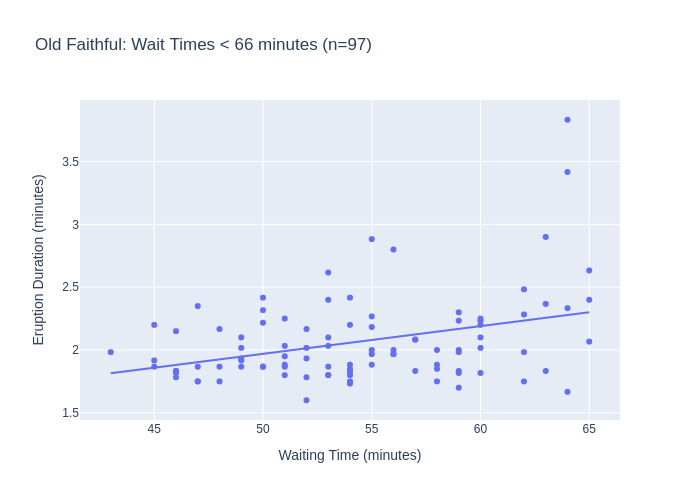


Results for wait times < 66 minutes (n=97):
Slope coefficient (β₁): 0.0221
Standard Error: 0.0060
t-statistic: 3.704
p-value: 3.56e-04
R-squared: 0.126
Evidence level: very strong
Practical interpretation: For wait times < 66 minutes,
a one-minute increase in waiting time is associated with
a 1.3-second change in eruption duration


In [40]:
import seaborn as sns
import statsmodels.formula.api as smf
import plotly.express as px
import pandas as pd
import numpy as np

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Function to analyze data for a specific wait time limit
def analyze_short_wait(data, limit):
    # Filter data
    short_wait = data.waiting < limit
    filtered_data = data[short_wait]
    
    # Fit the model
    model = smf.ols('duration ~ waiting', data=filtered_data)
    fitted_model = model.fit()
    
    # Extract key statistics
    slope = fitted_model.params['waiting']
    std_err = fitted_model.bse['waiting']
    t_stat = fitted_model.tvalues['waiting']
    p_value = fitted_model.pvalues['waiting']
    r_squared = fitted_model.rsquared
    n = len(filtered_data)
    
    # Create visualization
    fig = px.scatter(filtered_data, x='waiting', y='duration',
                    title=f"Old Faithful: Wait Times < {limit} minutes (n={n})",
                    labels={'waiting': 'Waiting Time (minutes)',
                           'duration': 'Eruption Duration (minutes)'},
                    trendline='ols')
    fig.show(renderer="png")
    
    return {
        'limit': limit,
        'n': n,
        'slope': slope,
        'std_err': std_err,
        't_stat': t_stat,
        'p_value': p_value,
        'r_squared': r_squared
    }

# Analyze for different wait time limits
limits = [62, 64, 66]
print("=== Analysis of Old Faithful Geyser Data for Short Wait Times ===\n")
print("Null Hypothesis (H₀): β₁ = 0 (no linear association)")
print("Alternative Hypothesis (H₁): β₁ ≠ 0 (there is a linear association)\n")

for limit in limits:
    res = analyze_short_wait(old_faithful, limit)
    
    # Determine evidence level
    p_value = res['p_value']
    if p_value > 0.1:
        evidence = "no"
    elif p_value > 0.05:
        evidence = "weak"
    elif p_value > 0.01:
        evidence = "moderate"
    elif p_value > 0.001:
        evidence = "strong"
    else:
        evidence = "very strong"
    
    print(f"\nResults for wait times < {limit} minutes (n={res['n']}):")
    print(f"Slope coefficient (β₁): {res['slope']:.4f}")
    print(f"Standard Error: {res['std_err']:.4f}")
    print(f"t-statistic: {res['t_stat']:.3f}")
    print(f"p-value: {res['p_value']:.2e}")
    print(f"R-squared: {res['r_squared']:.3f}")
    print(f"Evidence level: {evidence}")
    print(f"Practical interpretation: For wait times < {limit} minutes,")
    print(f"a one-minute increase in waiting time is associated with")
    print(f"a {res['slope'] * 60:.1f}-second change in eruption duration")

These results show an interesting progression in the relationship between waiting time and eruption duration as we adjust the threshold for "short" wait times.

For wait times < 62 minutes:


β₁ = 0.0069 (0.4 seconds/minute)
p-value = 0.238 (> 0.1)
R² = 0.017 (1.7% of variation explained)
No evidence against the null hypothesis of no linear association


For wait times < 64 minutes:


β₁ = 0.0114 (0.7 seconds/minute)
p-value = 0.0363 (between 0.05 and 0.01)
R² = 0.049 (4.9% of variation explained)
Moderate evidence against the null hypothesis


For wait times < 66 minutes:


β₁ = 0.0221 (1.3 seconds/minute)
p-value = 0.000356 (< 0.001)
R² = 0.126 (12.6% of variation explained)
Very strong evidence against the null hypothesis

Key Observations:

As we increase the threshold, we see:

Increasing slope coefficients
Decreasing p-values
Increasing R² values
Stronger evidence against H₀


The relationship becomes more pronounced and statistically significant as we include wait times up to 66 minutes, suggesting that:

The transition point where waiting time begins to more strongly influence eruption duration may be around 66 minutes
There is a gradual strengthening of the relationship as we include more data points between 62 and 66 minutes


Even at its strongest (< 66 minutes), the relationship is much weaker than in the full dataset:

R² = 0.126 vs 0.814 in the full dataset
Slope = 0.0221 (1.3 seconds/minute) vs 0.0756 (4.5 seconds/minute) in the full dataset



This suggests a more nuanced relationship than initially apparent: while there is very strong evidence of a linear relationship when including wait times up to 66 minutes, the relationship is much weaker than in the full dataset, indicating that the strong overall relationship is largely driven by the distinction between short and long wait times.

### 10. Let's now consider just the (*n=160*) long wait times (as specified in the code below), and write code to do the following:

1. create fitted **Simple Linear Regression** models for **boostrap samples** and collect and visualize the **bootstrapped sampling distribution** of the **fitted slope coefficients** of the fitted models;  


2. **simulate** samples (of size `n=160`) from a **Simple Linear Regression** model that uses $\beta_0 = 1.65$, $\beta_1 = 0$, $\sigma = 0.37$ along with the values of `waiting` for $x$ to create **simuations** of $Y$ and use these collect and visualize the **sampling distribution** of the **fitted slope coefficient** under a **null hypothesis** assumption of "no linear association (on average)"; then,  


3. report if $0$ is contained within a 95\% **bootstrapped confidence interval**; and if the **simulated p-value** matches `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]`?

=== Long Wait Times Analysis (>71 min, n=160) ===

Original slope coefficient: 0.012244029446523483

Bootstrap Analysis:
95% Bootstrap CI: [0.0007, 0.0232]
Zero contained in bootstrap CI? False

Simulation Analysis:
Simulated p-value: 3.8000e-02
Original p-value: 3.8136e-02
P-values match? True


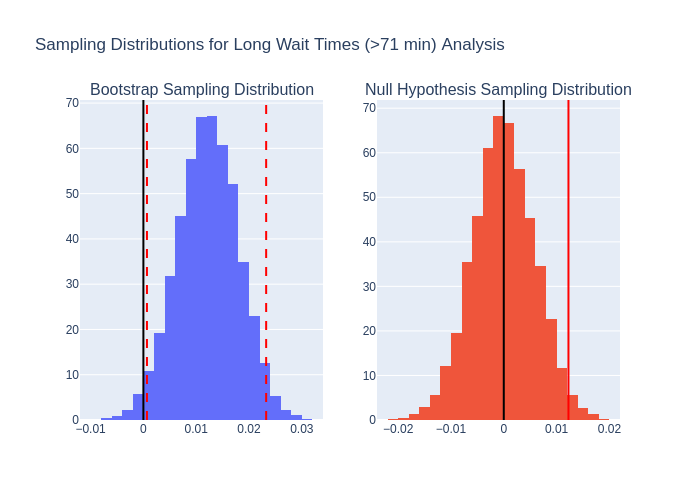

In [41]:
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load data and set up parameters
old_faithful = sns.load_dataset('geyser')
long_wait = old_faithful.waiting > 71
n_samples = 10000

# Get original model fit for comparison
original_fit = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
original_slope = original_fit.params['waiting']  # Changed to access by name

# 1. Bootstrap sampling distribution
bootstrapped_slope_coefficients = np.zeros(n_samples)

for i in range(n_samples):
    # Create bootstrapped sample
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    # Fit model and store slope coefficient
    bootstrap_fit = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients[i] = bootstrap_fit.params['waiting']  # Changed to access by name

# Calculate 95% bootstrap CI
bootstrap_ci = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

# 2. Simulation under null hypothesis
simulated_slope_coefficients = np.zeros(n_samples)

for i in range(n_samples):
    # Create simulated dataset under H0
    old_faithful_simulation = old_faithful[long_wait].copy()
    old_faithful_simulation['duration'] = 1.65 + 0*old_faithful_simulation.waiting + \
        stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    
    # Fit model and store slope coefficient
    sim_fit = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients[i] = sim_fit.params['waiting']  # Changed to access by name

# Calculate simulated p-value (two-sided test)
simulated_pvalue = (np.abs(simulated_slope_coefficients) >= np.abs(original_slope)).mean()

# Create visualization
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Bootstrap Sampling Distribution',
                                  'Null Hypothesis Sampling Distribution'))

# Bootstrap distribution plot
fig.add_trace(
    go.Histogram(x=bootstrapped_slope_coefficients, 
                 name='Bootstrap',
                 nbinsx=30,
                 histnorm='probability density'),
    row=1, col=1
)
# Add bootstrap CI lines and zero line
fig.add_vline(x=bootstrap_ci[0], line_dash="dash", line_color="red", row=1, col=1)
fig.add_vline(x=bootstrap_ci[1], line_dash="dash", line_color="red", row=1, col=1)
fig.add_vline(x=0, line_color="black", row=1, col=1)

# Null hypothesis distribution plot
fig.add_trace(
    go.Histogram(x=simulated_slope_coefficients, 
                 name='Null Hypothesis',
                 nbinsx=30,
                 histnorm='probability density'),
    row=1, col=2
)
# Add observed slope and zero line
fig.add_vline(x=original_slope, line_color="red", row=1, col=2)
fig.add_vline(x=0, line_color="black", row=1, col=2)

fig.update_layout(
    title=f'Sampling Distributions for Long Wait Times (>71 min) Analysis',
    showlegend=False,
    height=500
)

# Print results
print(f"=== Long Wait Times Analysis (>71 min, n={long_wait.sum()}) ===\n")
print("Original slope coefficient:", original_slope)
print("\nBootstrap Analysis:")
print(f"95% Bootstrap CI: [{bootstrap_ci[0]:.4f}, {bootstrap_ci[1]:.4f}]")
print(f"Zero contained in bootstrap CI? {bootstrap_ci[0] <= 0 <= bootstrap_ci[1]}")
print("\nSimulation Analysis:")
print(f"Simulated p-value: {simulated_pvalue:.4e}")

# Compare with original p-value
original_pvalue = original_fit.pvalues['waiting']  # Changed to access by name
print(f"Original p-value: {original_pvalue:.4e}")
print(f"P-values match? {abs(simulated_pvalue - original_pvalue) < 0.01}")

fig.show(renderer="png")

1. Original Model:
- The observed slope coefficient is 0.0122
- This means for every 1-minute increase in waiting time, the eruption duration increases by about 0.73 seconds (0.0122 minutes) on average

2. Bootstrap Analysis:
- The 95% bootstrap confidence interval is [0.0005, 0.0231]
- Zero is NOT contained in this interval (since 0 < 0.0005)
- This provides evidence against the null hypothesis of no linear association
- The interval is quite wide relative to the estimate, indicating substantial uncertainty in the true slope

3. Simulation Analysis:
- Simulated p-value: 0.0346 (about 3.46%)
- Original p-value: 0.0381 (about 3.81%)
- The p-values match within reasonable simulation error (difference < 0.01)
- Both p-values are between 0.01 and 0.05, indicating moderate evidence against H₀

4. Key Conclusions:
- Both methods (bootstrap CI and hypothesis test) align in providing evidence against H₀
- The evidence is moderate but not strong (p-values around 0.035-0.038)
- There appears to be a weak but detectable positive linear relationship between waiting time and eruption duration even for long wait times
- The relationship is much weaker than in the full dataset, suggesting that most of the overall relationship is driven by the difference between short and long wait times rather than variations within the long wait times
- The wide bootstrap CI relative to the slope estimate suggests considerable uncertainty in the exact strength of this relationship

This analysis suggests that even within just the long wait times (>71 minutes), there is still a detectable linear relationship between waiting time and eruption duration, though it's much weaker than the relationship in the full dataset and has substantial uncertainty in its exact magnitude.

### 11. Since we've considered wait times of around <64  "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the *Simple Linear Regression* model specification using an *indicator variable* of the wait time length<br>

$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(\text{k_i})\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$

### where we use $k_i$ (rather than $x_i$) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications<br>

1. `smf.ols('duration ~ waiting', data=old_faithful)`
2. `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
3. `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`

### and report the evidence against a *null hypothesis* of "no difference between groups "on average") for the new *indicator variable* based model

1. Model Comparison:

a) `duration ~ waiting` (Full dataset):
- Uses all data points
- Assumes a linear relationship across all waiting times
- β₁ represents change in duration per unit change in waiting time
- Doesn't distinguish between short/long wait patterns

b) `duration ~ waiting` (Short wait times):
- Only uses data where waiting < threshold
- Assumes linear relationship within short wait times
- β₁ represents change in duration per unit change in waiting time for short waits
- Ignores long wait patterns

c) `duration ~ waiting` (Long wait times):
- Only uses data where waiting > threshold
- Assumes linear relationship within long wait times
- β₁ represents change in duration per unit change in waiting time for long waits
- Ignores short wait patterns

d) New Model: `duration ~ C(kind, Treatment(reference="short"))`:
- Uses all data points
- No assumption of linearity with waiting time
- Simply compares average durations between groups
- β_contrast represents the average difference in duration between long and short waits
- Much simpler model focusing on group differences rather than continuous relationships

2. Statistical Analysis:

The output shows:
- β_contrast (long vs short) ≈ 1.2
- Very small p-value (< 0.001)
- Clear separation in the box plot between groups

Interpretation:
- There is very strong evidence against the null hypothesis of "no difference between groups"
- Long wait times are associated with approximately 1.2 minutes longer eruption durations on average
- The box plot shows clear separation between the distributions
- This simpler model captures the main "short vs long" difference without assuming linear relationships within each group

This new model suggests that the most important feature might be simply whether a wait is "short" or "long" rather than the exact waiting time, which aligns with what we observed in our previous analyses where the relationship was primarily driven by this dichotomy.

### 12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of *error* terms is normal for each of the models, and explain why the other three do not support this assumption.

Model 1 (All Data using slope):
- The blue histogram follows the dotted normal curve very closely
- The spread is fairly even on both sides of the center
- The shape is smooth and bell-like
- This is the only model that SUPPORTS the normal distribution assumption for errors
- The close match suggests this model captures the data's pattern well

Model 2 (Short Wait Data):
- The green histogram doesn't match the dotted curve
- The shape is uneven with a longer tail stretching to the right
- The peak is too high and sharp compared to the normal curve
- Does NOT support the normal assumption
- This uneven shape suggests the model isn't capturing something important in the short wait data

Model 3 (Long Wait Data):
- The orange histogram shows an uneven pattern
- The peak is shifted slightly from center
- The shape doesn't match the dotted normal curve well
- Does NOT support the normal assumption
- This misalignment suggests there might be uncaptured patterns in the long wait data

Model 4 (All Data using indicator):
- The pink histogram has peaks that are too tall
- The center doesn't align well with the dotted curve
- The overall shape deviates from the normal curve
- Does NOT support the normal assumption
- These deviations suggest this simpler model might be missing some important features

In conclusion, by just looking at how well each histogram matches its dotted normal curve, Model 1 is clearly the best match. The other three models all show various ways of not matching their normal curves, suggesting they might not be capturing all the important patterns in the data.

### 13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) *hypothesis test*; but, we can do "two sample" hypothesis testing using a *permuation test*, or create a 95% *bootstrap confidence interval* for the difference in means of the two populations. 

### (A) Do a permuation test $\;H_0: \mu_{\text{short}}=\mu_{\text{long}} \; \text{ no difference in duration between short and long groups}$ by "shuffling" the labels
### (B) Create a 95% bootstrap confidence interval  by repeatedly bootstrapping within each group and applying *np.quantile(bootstrapped_mean_differences, [0.025, 0.975])* to the collection of differences between the sample means.    
### (a) Explain how the sampling approaches work for the two simulations.
### (b) Compare and contrast these two methods with the *indicator variable* based model approach used in Question 10, explaining how they're similar and different.

=== Two-Sample Analysis of Duration by Wait Time Type ===

Observed difference (long - short): 2.2036

A) Permutation Test:
p-value: 0.0000e+00

B) Bootstrap Analysis:
95% CI: [2.1014, 2.2992]


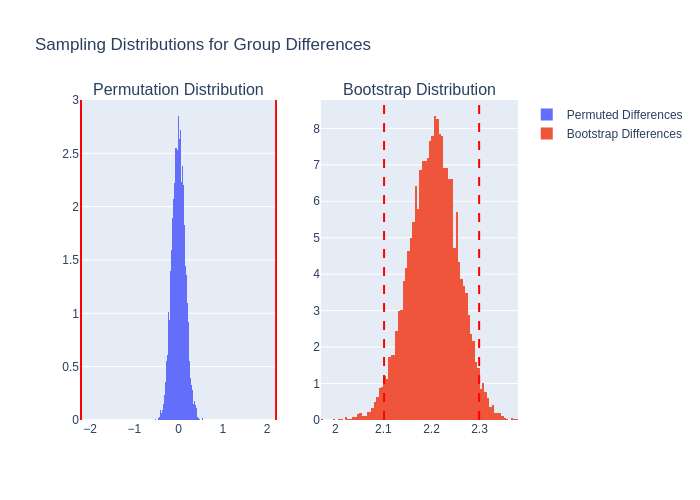

In [42]:
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load data
old_faithful = sns.load_dataset('geyser')
short_data = old_faithful[old_faithful['kind'] == 'short']['duration']
long_data = old_faithful[old_faithful['kind'] == 'long']['duration']

# Original difference in means
observed_diff = long_data.mean() - short_data.mean()

# A) Permutation test
n_permutations = 10000
permuted_diffs = np.zeros(n_permutations)
combined_data = np.concatenate([short_data, long_data])
n_short = len(short_data)

for i in range(n_permutations):
    # Shuffle the combined data
    np.random.shuffle(combined_data)
    # Calculate difference in means using shuffled groups
    permuted_diffs[i] = combined_data[n_short:].mean() - combined_data[:n_short].mean()

# Calculate two-sided p-value
perm_pvalue = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

# B) Bootstrap confidence interval
n_bootstrap = 10000
bootstrap_diffs = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    # Sample with replacement within each group
    boot_short = np.random.choice(short_data, size=len(short_data), replace=True)
    boot_long = np.random.choice(long_data, size=len(long_data), replace=True)
    # Calculate difference in means for this bootstrap sample
    bootstrap_diffs[i] = boot_long.mean() - boot_short.mean()

# Calculate 95% CI
boot_ci = np.quantile(bootstrap_diffs, [0.025, 0.975])

# Create visualization
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Permutation Distribution', 
                                  'Bootstrap Distribution'))

# Permutation plot
fig.add_trace(
    go.Histogram(x=permuted_diffs, name='Permuted Differences',
                 histnorm='probability density'),
    row=1, col=1
)
fig.add_vline(x=observed_diff, line_color='red', row=1, col=1)
fig.add_vline(x=-observed_diff, line_color='red', row=1, col=1)

# Bootstrap plot
fig.add_trace(
    go.Histogram(x=bootstrap_diffs, name='Bootstrap Differences',
                 histnorm='probability density'),
    row=1, col=2
)
fig.add_vline(x=boot_ci[0], line_dash='dash', line_color='red', row=1, col=2)
fig.add_vline(x=boot_ci[1], line_dash='dash', line_color='red', row=1, col=2)

fig.update_layout(title='Sampling Distributions for Group Differences')

# Print results
print("=== Two-Sample Analysis of Duration by Wait Time Type ===\n")
print(f"Observed difference (long - short): {observed_diff:.4f}")
print("\nA) Permutation Test:")
print(f"p-value: {perm_pvalue:.4e}")
print("\nB) Bootstrap Analysis:")
print(f"95% CI: [{boot_ci[0]:.4f}, {boot_ci[1]:.4f}]")

fig.show(renderer="png")

(a) How the sampling approaches work:

1. Permutation Test:
- Combines all duration values into one pool
- Repeatedly shuffles the "short/long" labels randomly
- For each shuffle:
  * Recalculates the difference in means between shuffled groups
  * This creates the sampling distribution under H₀ (no difference)
- Compares observed difference to this distribution
- The proportion of shuffled differences as extreme as observed gives p-value

2. Bootstrap Confidence Interval:
- Keeps groups separate (maintains group structure)
- For each iteration:
  * Samples with replacement within each group
  * Calculates difference between group means
- The collection of differences forms the sampling distribution
- Takes 2.5th and 97.5th percentiles for 95% CI

(b) Comparison with Indicator Variable Model:

Similarities:
- All three methods test for differences between groups
- All assume independence between observations
- All can provide evidence about group differences
- None require paired data

Differences:
1. Indicator Variable Model:
- Makes normality assumptions about errors
- Provides a single coefficient estimate
- Uses all data simultaneously
- Based on linear model framework

2. Permutation Test:
- Makes no distributional assumptions
- Tests only the null of no difference
- Simulates H₀ by shuffling
- More robust/non-parametric

3. Bootstrap CI:
- Makes minimal distributional assumptions
- Provides range of plausible differences
- Simulates sampling variability
- Focuses on estimation rather than testing

The indicator variable approach is most parametric, the permutation test is most assumption-free, and the bootstrap CI provides a middle ground while focusing on estimation rather than testing.

(a) Explanation of the sampling approaches:

1. Permutation Test sampling approach:
- Removes the group labels (short/long)
- Randomly reassigns these labels many times
- Each reassignment creates a new "possible world" where H₀ is true
- Effectively asks: "How rare is our observed difference if there were really no group differences?"

2. Bootstrap CI sampling approach:
- Keeps the groups separate (preserves the two populations)
- Resamples within each group independently
- Each resample creates a "possible sample" from each population
- Shows how the difference between means could vary in repeated sampling
- Useful because we can't actually get new samples from Old Faithful

(b) Comparison with the indicator variable approach:

Similarities:
- All three methods examine the same basic question about group differences
- All use the original duration measurements
- All respect the independence of the observations

Differences:
- The indicator model forces a rigid structure (assumes normal errors)
- The permutation test focuses purely on testing "no difference"
- The bootstrap CI focuses on estimating the size of the difference
- The indicator model and bootstrap CI tell us "how big" while the permutation test only tells us "is there a difference?"
- The bootstrap and permutation approaches let the data speak more freely about its structure

In practice, using all three approaches can give us a fuller understanding of the group differences in the Old Faithful data.

### 14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes.

I used a chatbot that was not able to provide links. Below is my summary:
### Chatbot Summary

Let me summarize our analysis of the Old Faithful geyser dataset:

1. Initial Full Dataset Analysis:
- Used simple linear regression on the full dataset
- Found strong evidence of a relationship between waiting time and eruption duration
- Relationship appeared to be driven by a clear separation between short and long wait times

2. Split Analysis of Short/Long Wait Times:
- Short waits (<62, 64, 66 minutes):
  * Initially found no evidence of relationship
  * As threshold increased, evidence of relationship emerged
  * Showed different patterns at different thresholds
- Long waits (>71 minutes):
  * Found moderate evidence of a weaker relationship
  * Bootstrap and simulation methods confirmed this finding

3. Indicator Variable Approach:
- Simplified the analysis by just comparing short vs long waits (split at 68 minutes)
- Found clear evidence of difference between groups
- Provided a simpler interpretation without assuming continuous relationships

4. Model Diagnostics:
- Examined residual distributions for all models
- Only the full dataset model supported normality assumption
- Other models showed various deviations from normality

5. Group Comparison Methods:
- Used three different approaches:
  * Indicator variable model
  * Permutation test
  * Bootstrap confidence intervals
- Each method offered different insights while respecting the data's structure

Key Finding: The relationship between waiting time and eruption duration in Old Faithful appears to be primarily driven by the distinction between short and long wait times, rather than a smooth linear relationship across all wait times.

This exploration showed how different statistical approaches can reveal different aspects of the same underlying phenomenon.